<a href="https://colab.research.google.com/github/shruttiguptta/Exploratory-data-Ananlysis/blob/main/AnimeEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('anime-list.csv', index_col=[0])

In [5]:
df = df.reset_index()


In [ ]:
df.isnull().sum()

### *Check duplicates*

In [ ]:
df[df.duplicated() == True]

Since we see no rows, that means all rows are unique. We can go ahead with EDA

In [8]:
#use forward/backward fill to replace nan values
df.tags.fillna(method = 'ffill', inplace=True)
df.source.fillna(method = 'ffill', inplace=True)
df.rating.fillna(method = 'ffill', inplace=True)
df.year.fillna(method = 'ffill', inplace=True)
df.synopsis.fillna(method = 'ffill', inplace=True)
df.status.fillna(method = 'ffill', inplace=True)
df.eps.fillna(method = 'ffill', inplace=True)
df.eps_avg_duration_in_min.fillna(method = 'ffill', inplace=True)

In [ ]:
#check
df.eps_avg_duration_in_min.unique()

In [10]:
#df.drop(['Unnamed: 0'], axis=1, inplace = True)
#df.set_index("name", inplace = True)
#df.rename(cols = {'Unnamed: 0':'Index'})

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
#fix datatypes

df['name'] = df['name'].astype(str)
df['studio'].astype(str)
df['theme'].astype(str)
df['tags'].astype(str)
df['source'].astype(str)
df['synopsis'].astype(str)
df['demographic'].astype(str)
df['status'].astype(str)
df['rated_by'].astype(str)

### *which anime has the highest rating?*

In [ ]:

df.loc[df['rating'].idxmax()]

### *find the highest rated anime in each demographic/theme/studio.*

In [16]:
temp = df.groupby('demographic')


each demographic

In [ ]:
df.loc[temp["rating"].idxmax()].sort_values(by = ['rating'], ascending=False)

each theme

In [ ]:
df.loc[df.groupby('theme')["rating"].idxmax()].sort_values(by = ['rating'], ascending=False)

each studio

In [ ]:
df.loc[df.groupby('studio')["rating"].idxmax()].sort_values(by = ['rating'], ascending=False)

### *Least liked anime in each studio*

In [ ]:
df.loc[df.groupby('studio')["rating"].idxmin()].sort_values(by = ['rating'], ascending=False)

### *Least liked anime in each demographic*

In [ ]:
df.loc[df.groupby('demographic')["rating"].idxmin()].sort_values(by = ['rating'], ascending=False)

### *Least liked anime in each theme*

In [ ]:
df.loc[df.groupby('theme')["rating"].idxmin()].sort_values(by = ['rating'], ascending=False)

In [ ]:
#what are the 5 most liked animes in a specific year
temp = df[df.year ==2022]
temp.sort_values(by=['rating'], ascending=False)[:5]
#df.loc[temp["rating"].idxmax()].sort_values(by = ['rating'], ascending=False)

In [ ]:
temp = df[df.year.ge(2000) & df.year.le(2022)].sort_values('rating', ascending=False)
temp.head()

### *what is the min, max, average number of episodes in anime?*

In [ ]:
df.eps.aggregate(['average', 'min', 'max'])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(25,80))

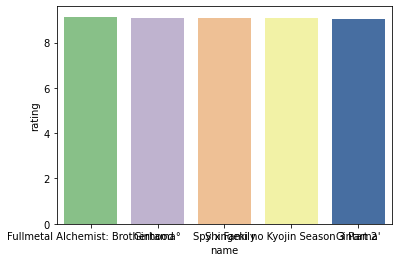

In [34]:
sns.barplot(x='name', y = 'rating', palette = 'Accent', data = df[df['demographic'] == 'Shounen'].sort_values('rating', ascending=False).head())
plt.show()

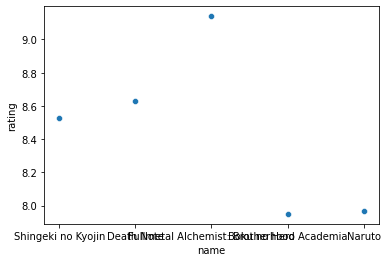

In [37]:
sns.scatterplot(x='name', y = 'rating', palette = 'Accent', data = df[df['demographic'] == 'Shounen'][:5])
plt.show()